In [1]:
#In practice, we need some more effective tools for looking at our
#training accuracy, especially in respect to a validation dataset.
#This validation dataset is something that is set aside and not used
#in training, so we can get a fair estimate of model accuracy
#in the context of unseen data.

import keras

#Same exampleNet as before:
def exampleNet():
    m = keras.models.Sequential()
    m.add(keras.layers.Conv2D(filters=64,
                              kernel_size=(4,4),
                              activation="tanh",
                              input_shape=(256,256,3)))
    m.add(keras.layers.GlobalAveragePooling2D())
    m.add(keras.layers.Dense(units=21))
    m.compile(optimizer=keras.optimizers.SGD(learning_rate=.001),
                                            loss='categorical_hinge',
                                            metrics=['categorical_accuracy'])
    
    return(m)

#Here, we're going to add a validation split into our data generator (in this case, taking 30% of our data):
dataGenerator = keras.preprocessing.image.ImageDataGenerator(validation_split=0.3)

#And, now we can use that to save 30% of our data into a test set, and the rest into train:
test = dataGenerator.flow_from_directory("./mercerImages", class_mode='categorical', batch_size=32, subset="validation")
train = dataGenerator.flow_from_directory("./mercerImages", class_mode='categorical', batch_size=32, subset="training")

#Now when we run you'll see two different accuracy values - the training accuracy (categorical_accuracy) and the validation (val_categorical_accuracy).
#You should always be using this approach when you fit your models to avoid overfitting!
exampleNet = exampleNet()
modelHistory = exampleNet.fit(train, epochs=15, validation_data=test)

Found 630 images belonging to 21 classes.
Found 1470 images belonging to 21 classes.
Epoch 1/15
46/46 [==============================] - 6s 77ms/step - loss: 2.2400 - categorical_accuracy: 0.0656 - val_loss: 1.7648 - val_categorical_accuracy: 0.0667
Epoch 2/15
46/46 [==============================] - 3s 65ms/step - loss: 1.6865 - categorical_accuracy: 0.0918 - val_loss: 1.5798 - val_categorical_accuracy: 0.0524
Epoch 3/15
46/46 [==============================] - 3s 62ms/step - loss: 1.5120 - categorical_accuracy: 0.0843 - val_loss: 1.4769 - val_categorical_accuracy: 0.0381
Epoch 4/15
46/46 [==============================] - 3s 68ms/step - loss: 1.4203 - categorical_accuracy: 0.1000 - val_loss: 1.4270 - val_categorical_accuracy: 0.0413
Epoch 5/15
46/46 [==============================] - 3s 67ms/step - loss: 1.3705 - categorical_accuracy: 0.1072 - val_loss: 1.3722 - val_categorical_accuracy: 0.1032
Epoch 6/15
46/46 [==============================] - 3s 69ms/step - loss: 1.2890 - categori

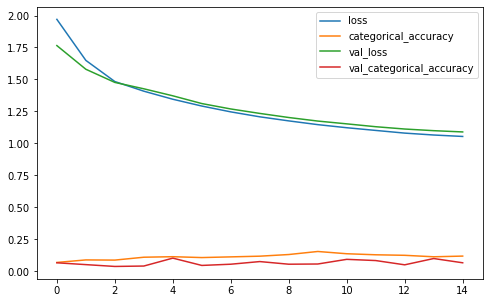

In [2]:
#We also want some better tools to diagnose our models. 
#Thankfully, Keras makes this very easy!
from matplotlib import pyplot as plt
import pandas as pd

pd.DataFrame(modelHistory.history).plot(figsize=(8,5))
plt.show()

Found 630 images belonging to 21 classes.
Found 1470 images belonging to 21 classes.
Epoch 1/15
46/46 [==============================] - 31s 533ms/step - loss: 1.0120 - categorical_accuracy: 0.0548 - val_loss: 1.0054 - val_categorical_accuracy: 0.0524
Epoch 2/15
46/46 [==============================] - 15s 319ms/step - loss: 1.0046 - categorical_accuracy: 0.0633 - val_loss: 1.0041 - val_categorical_accuracy: 0.0603
Epoch 3/15
46/46 [==============================] - 15s 317ms/step - loss: 1.0035 - categorical_accuracy: 0.0888 - val_loss: 1.0034 - val_categorical_accuracy: 0.0587
Epoch 4/15
46/46 [==============================] - 15s 317ms/step - loss: 1.0027 - categorical_accuracy: 0.0965 - val_loss: 1.0030 - val_categorical_accuracy: 0.0619
Epoch 5/15
46/46 [==============================] - 15s 326ms/step - loss: 1.0024 - categorical_accuracy: 0.0915 - val_loss: 1.0028 - val_categorical_accuracy: 0.0651
Epoch 6/15
46/46 [==============================] - 15s 321ms/step - loss: 1.002

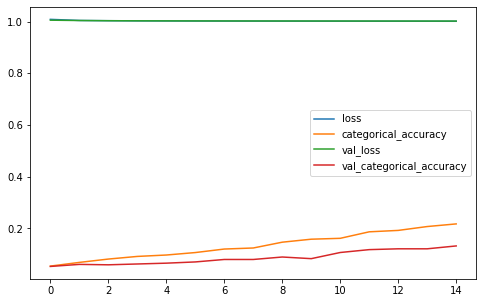

In [3]:
VGG16Net = keras.applications.VGG16(classes=21, weights=None)
VGG16Net.compile(optimizer=keras.optimizers.SGD(learning_rate=.001),
                                            loss='categorical_hinge',
                                            metrics=['categorical_accuracy'])
#Now let's explore the dataGenerator function a bit more, using a VGG model as an example.
#The dataGenerator is incredibly powerful, and does many of the things we used to do manually
#through arguments.  Here, we are going to:
#(1) Apply a validation split
#(2) Zero-mean shift all of our data
#(3) Pad our data using a nearest neighbor interpolation
#Note you can learn more about what these classes can do at https://keras.io/api/preprocessing/image/#imagedatagenerator-class .
dataGenerator = keras.preprocessing.image.ImageDataGenerator(validation_split=0.3, samplewise_center=True, fill_mode="nearest")

#Here, we're goign to reshape all of our images to the same target size.
#This is required by most models, including VGG.
test = dataGenerator.flow_from_directory("./mercerImages", class_mode='categorical', 
                                            batch_size=32, subset="validation", 
                                            target_size=(224,224))
                                        
train = dataGenerator.flow_from_directory("./mercerImages", class_mode='categorical', 
                                        batch_size=32, subset="training", 
                                        target_size=(224,224))

#Now when we run you'll see two different accuracy values - the training accuracy (categorical_accuracy) and the validation (val_categorical_accuracy).
#You should always be using this approach when you fit your models to avoid overfitting!
modelHistory = VGG16Net.fit(train, epochs=15, validation_data=test)

pd.DataFrame(modelHistory.history).plot(figsize=(8,5))
plt.show()

Epoch 1/5
782/782 [==============================] - 40s 48ms/step - loss: 1.3001 - categorical_accuracy: 0.1122 - val_loss: 1.2285 - val_categorical_accuracy: 0.1349
Epoch 2/5
782/782 [==============================] - 37s 47ms/step - loss: 1.1899 - categorical_accuracy: 0.1376 - val_loss: 1.1382 - val_categorical_accuracy: 0.1741
Epoch 3/5
782/782 [==============================] - 36s 46ms/step - loss: 1.1272 - categorical_accuracy: 0.1756 - val_loss: 1.0846 - val_categorical_accuracy: 0.2165
Epoch 4/5
782/782 [==============================] - 37s 47ms/step - loss: 1.0922 - categorical_accuracy: 0.2072 - val_loss: 1.0656 - val_categorical_accuracy: 0.2364
Epoch 5/5
782/782 [==============================] - 36s 47ms/step - loss: 1.0722 - categorical_accuracy: 0.2263 - val_loss: 1.0453 - val_categorical_accuracy: 0.2398


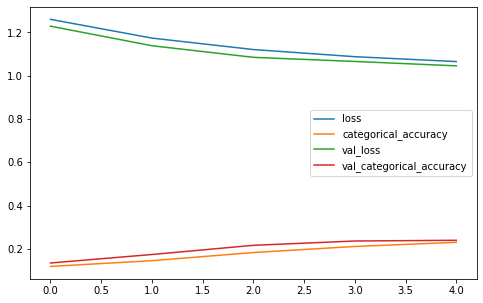

In [13]:
import tensorflow as tf
#You can also load in a number of test datasets directly into Keras,
#as a part of the package.  So if you want to test something on CIFAR10, or train on it,
#it just takes a few lines of code. 
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

#Convert our class vectors into one-hot-encoded class matrices (with 10 classes)
#Uncomment the prints for example of what's going on
#print(train_labels[0])
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)
#print(train_labels[0])

ResNet50Net = keras.applications.ResNet50(classes=10, weights=None)
ResNet50Net.compile(optimizer=keras.optimizers.SGD(learning_rate=.001),
                                            loss='categorical_hinge',
                                            metrics=['categorical_accuracy'])


dataGenerator = keras.preprocessing.image.ImageDataGenerator(validation_split=0.3, samplewise_center=True)

#Note you may need to turn the batch_size down here, depending on your computers capabilities.
modelHistory = ResNet50Net.fit(dataGenerator.flow(train_images, train_labels, batch_size=64), 
                                                    epochs=5, 
                                                    validation_data=dataGenerator.flow(test_images,test_labels, batch_size=64))

pd.DataFrame(modelHistory.history).plot(figsize=(8,5))
plt.show()